In [1]:
import pandas as pd
import numpy as np

In [3]:
#Load Plant Data - Remove duplicate and Null Columns
plant_full_data = pd.read_excel('./Data/Plant Master.xlsx')

In [4]:
plant_full_data.head()

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka


In [5]:
plant_full_data.isnull().sum()

Plant                        0
Name 1                       0
Valuation Area               0
Customer no. - plant         0
Vendor number plant        436
Factory calendar             0
Name 2                       2
House number and street      2
PO Box                       1
Postal Code                  0
City                         0
Sales organization           5
State                        0
dtype: int64

In [6]:
plant_full_data.shape

(438, 13)

In [160]:
#Drop columns=['Vendor number plant', 'Valuation Area', 'Factory calendar', 'Name 2', 'House number and street', 'PO Box', 'Sales organization']
#plant = plant_full_data.drop(columns=['Vendor number plant', 'Valuation Area', 'Factory calendar', 'Name 2', 'House number and street', 'PO Box', 'Sales organization', 'Customer no. - plant'])

In [8]:
plant = plant_full_data
plant.shape

(438, 13)

In [9]:
plant.isnull().sum()

Plant                        0
Name 1                       0
Valuation Area               0
Customer no. - plant         0
Vendor number plant        436
Factory calendar             0
Name 2                       2
House number and street      2
PO Box                       1
Postal Code                  0
City                         0
Sales organization           5
State                        0
dtype: int64

In [10]:
#Read Customer Data - Remove Duplicate and Missing values columns.
customer_full_data = pd.read_excel('./Data/Customer_Data.xlsx')

In [11]:
customer_full_data.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.0,Z001,NaN,NaN,NaN,NaN,NaT
1,32,2,1.0,Z005,NaN,NaN,NaN,NaN,NaT
2,34,4,1.0,Z005,NaN,2.0,NaN,NaN,NaT
3,35,5,1.0,Z005,NaN,NaN,NaN,NaN,NaT
4,42,7,1.0,Z008,NaN,NaN,NaN,NaN,NaT


In [12]:
customer_full_data.shape

(555338, 9)

In [13]:
customer_full_data.isnull().sum()

Business Partner         0
Customer No.             0
Partner Type            78
Data Origin            136
Title                46307
Marital Status      539301
Occupation          540780
Date of Birth       541894
Death date          554675
dtype: int64

In [167]:
#customer = customer_full_data.drop(columns = ['Marital Status', 'Occupation', 'Date of Birth', 'Death date', 'Business Partner'])

In [14]:
customer = customer_full_data
customer.dtypes

Business Partner            object
Customer No.                object
Partner Type               float64
Data Origin                 object
Title                      float64
Marital Status             float64
Occupation                 float64
Date of Birth               object
Death date          datetime64[ns]
dtype: object

In [15]:
customer.isnull().sum()

Business Partner         0
Customer No.             0
Partner Type            78
Data Origin            136
Title                46307
Marital Status      539301
Occupation          540780
Date of Birth       541894
Death date          554675
dtype: int64

In [16]:
#Fill Missing Values in Partner Type, Data Origin, Title columns with most_frequently used values.
most_frequent_value = customer['Partner Type'].mode()
customer['Partner Type'] = customer['Partner Type'].fillna(most_frequent_value[0])

In [17]:
customer['Data Origin'] = customer['Data Origin'].fillna(customer['Data Origin'].mode()[0])

In [18]:
customer['Title'] = customer['Title'].fillna(customer['Title'].mode()[0])

In [19]:
customer.isnull().sum()

Business Partner         0
Customer No.             0
Partner Type             0
Data Origin              0
Title                    0
Marital Status      539301
Occupation          540780
Date of Birth       541894
Death date          554675
dtype: int64

In [20]:
#Load Invoice Data - Handle missing, duplicate data
invoice_full_data = pd.read_csv('./Data/Final_invoice.csv',index_col=0)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
invoice_full_data.head()

,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,...,Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,...,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,...,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,...,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,...,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,...,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [22]:
invoice_full_data.shape

(492314, 58)

In [23]:
invoice_full_data[invoice_full_data['Customer No.']=='E14006']

,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,...,Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
596342,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Nashik,NaN,NaN,...,NaN,0.0,VILAS,3224.98,0.0,0.0,0.0,0.0,3224.98,BC03SA2
655477,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Nashik,NaN,NaN,...,NaN,0.0,NaN,420.09,0.0,0.0,0.0,0.0,420.09,GOLIVE
671744,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Nashik,NaN,NaN,...,NaN,0.0,NaN,1637.43,0.0,0.0,0.0,0.0,1637.43,BC03SA3
698201,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Nashik,NaN,NaN,...,NaN,0.0,CX,1803.27,0.0,0.0,0.0,0.0,1803.27,BC03SA3


In [178]:
#columns_to_be_removed = invoice_full_data.isnull().sum()[invoice_full_data.isnull().sum().sort_values() > 29178].index

In [179]:
#columns_to_be_removed

Index(['Amt Rcvd From Custom', 'Amt Rcvd From Ins Co', 'CGST(14%)',
       'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)', 'Cash /Cashless Type',
       'Claim No.', 'Expiry Date', 'Gate Pass Date', 'IGST(12%)', 'IGST(18%)',
       'IGST(28%)', 'IGST(5%)', 'Insurance Company', 'ODN No.',
       'Outstanding Amt', 'Policy no.', 'SGST/UGST(14%)', 'SGST/UGST(2.5%)',
       'SGST/UGST(6%)', 'SGST/UGST(9%)', 'Service Advisor Name', 'TDS amount',
       'Technician Name', 'Total CGST', 'Total GST', 'Total IGST',
       'Total SGST/UGST', 'Total Value'],
      dtype='object')

In [180]:
invoice = invoice_full_data.drop(columns=columns_to_be_removed)

In [24]:
invoice = invoice_full_data
invoice.shape

(492314, 58)

In [25]:
invoice.head(5)

,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,...,Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,...,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,...,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,...,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,...,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,...,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [183]:
#columns_irrelevant = ['Area / Locality', 'Print Status', 'Gate Pass Time', 'Recovrbl Exp', 'CITY']

In [184]:
#invoice = invoice.drop(columns=columns_irrelevant)

In [185]:
#invoice.dropna(subset=['Regn No'], inplace=True)

In [26]:
invoice.isnull().sum().sort_values()

Labour Total                 0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Make                         0
Misc Total                   0
Invoice No                   0
OSL Total                    0
Parts Total                  0
Pin code                     0
Plant                        0
Plant Name1                  0
Print Status                 0
Recovrbl Exp                 0
Total Amt Wtd Tax.           0
Order Type                   0
Invoice Date                 0
User ID                      0
Customer No.                 0
Gate Pass Time               0
District                     0
Cust Type                    0
CITY                         1
Regn No                     16
Model                     1525
Area / Locality          23890
SGST/UGST(14%)          197286
SGST/UGST(2.5%)         197286
SGST/UGST(6%)           197286
SGST/UGST(9%)           197286
CGST(6%)

In [27]:
invoice['Cust Type'] = invoice['Cust Type'].fillna(invoice['Cust Type'].mode()[0])
#invoice['CITY'] = invoice['CITY'].fillna(invoice['CITY'].mode()[0])
invoice['Model']  = invoice['Model'].fillna(invoice['Model'].mode()[0])

In [28]:
invoice.isnull().sum().sort_values()

Labour Total                 0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Make                         0
Misc Total                   0
Model                        0
OSL Total                    0
Order Type                   0
Parts Total                  0
Pin code                     0
Plant                        0
Plant Name1                  0
Print Status                 0
Recovrbl Exp                 0
Total Amt Wtd Tax.           0
Invoice No                   0
Invoice Date                 0
User ID                      0
Customer No.                 0
Gate Pass Time               0
District                     0
Cust Type                    0
CITY                         1
Regn No                     16
Area / Locality          23890
SGST/UGST(14%)          197286
SGST/UGST(2.5%)         197286
SGST/UGST(6%)           197286
SGST/UGST(9%)           197286
IGST(5%)

In [29]:
invoice['Order Type'].value_counts()

Running Repairs      269455
Paid Service         135004
Accidental            44159
SMC Redemption        15738
Mechanical            15100
SMC Value Package      9781
Repeat Order           3043
WBW Order                17
Workshop Damage          17
Name: Order Type, dtype: int64

In [30]:
#Read JTD data - Handle missing and duplicate data
jtd = pd.read_csv('./Data/JTD.csv',index_col=0)

C:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [31]:
jtd.head()

,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63


In [32]:
jtd.shape

(5619484, 9)

In [33]:
jtd[jtd['DBM Order']==98050]

,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
2674242,98050,10,1EMJ96615412,NaN,SWITCH A-A/C CONTROL,P002,1.0,EA,5185.92
2674243,98050,20,1EMJ96548238,NaN,WEATHER STRIP A-REAR DOOR LH,P002,1.0,EA,1433.49
2674244,98050,30,1EMJ96548102,NaN,WEATHER STRIP A-FRONT DOOR LH,P002,1.0,EA,1526.88
2674245,98050,40,1EMJ96548239,NaN,WEATHER STRIP A-REAR DOOR RH,P002,1.0,EA,1433.49
2674246,98050,50,1EMJ96548103,NaN,WEATHER STRIP A-FRONT DOOR RH,P002,1.0,EA,1526.88


In [34]:
len(jtd['Order Quantity'].unique())

3604

In [35]:
aggregation_jtd_dbno={ 'Description' : {'Description' : lambda x: str(set(x)).strip('{}').replace("'","")},
                      'Item Category' : {'Item Category' : lambda x: str(set(x)).strip('{}').replace("'","")}, 
                      'Order Quantity' : {'Order Quantity' : 'sum'},
                      'Net value' : {'Net value' : 'sum'} }
jtd_grouped = jtd.groupby('DBM Order')['Description','Item Category','Order Quantity','Net value'].agg(aggregation_jtd_dbno).reset_index()

C:\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


In [36]:
jtd_grouped.head()

,DBM Order,Description,Item Category,Order Quantity,Net value
0,4,"VALVE 1-INTAKE, FILTER-OIL, MISC_OTHER CHARGES...","P001, P010, P011, P002",731.6,16998.49
1,5,"MISC LABOR 0.5 HOURS, BULB 60/55W,12V,P43T, FI...","P001, P002",290.2,3779.80
2,6,"MISC LABOR 0.5 HOURS, REPLACE STARTER MOTOR AS...",P001,109.0,1340.37
3,7,MISC LABOR 0.25 HOURS,P001,36.5,167.36
4,8,"ELF Synthetic Engine OIL, REPLACE ENGINE OIL &...","P001, P002",69.0,2306.94


In [37]:
jtd_grouped.shape

(973473, 5)

In [38]:
jtd['Description'].value_counts().head(50)

MISC_OTHER CHARGES                        270563
Paid Service-Minor                        201857
WASHING                                   199068
Wheel Alignment                           191211
OIL FILTER                                154387
URANIA SUPREMO CI 4 15W 40                122218
MFC PROLEUM CI4/SL 15W40                   92091
AIR FILTER                                 80211
Wheel Balancing (5 Wheels)                 79970
MISC LABOR 0.5 HOURS                       62982
General Check up                           62459
Paid Service-Major                         60369
WINDSHIELD LIQUID WASHER                   55352
MISC LABOR 0.25 HOURS                      50143
DISTILLED WATER                            46919
Interior & Upholstery Cleaning             44864
REPLACE BRAKE PAD (BOTH SIDE)              38552
PAINTING CHARGES                           34187
MISC LABOR 1 HOUR                          33993
BALANCE WEIGHT 15GRAM                      31791
MISC LABOR 2 HOURS  

In [39]:
jtd.shape

(5619484, 9)

In [40]:
jtd.isnull().sum().sort_values()

DBM Order                    0
Order Item                   0
Item Category                0
Order Quantity               0
Net value                    0
Material                 51629
Description              51629
Target quantity UoM      51629
Labor Value Number     3774033
dtype: int64

In [41]:
#Merge the Data - Merge Invoice and Customer Data on Customer No. Key
invoice['Customer No.'] = invoice['Customer No.'].str.lstrip('0')

In [42]:
customer['Customer No.'] = customer['Customer No.'].astype(str)

In [43]:
invoice_customer = pd.merge(invoice, customer, on='Customer No.')
invoice_customer.to_csv('./EDA_Data/invoice_customer.csv', index=False)

In [44]:
invoice_customer.shape, len(invoice['Customer No.'].unique()), len(customer['Customer No.'].unique()), len(invoice_customer['Customer No.'].unique())

((492312, 66), 253484, 555338, 253482)

In [45]:
invoice_customer.isnull().sum()

Amt Rcvd From Custom    197284
Amt Rcvd From Ins Co    197284
Area / Locality          23890
CGST(14%)               197284
CGST(2.5%)              197284
                         ...  
Title                        0
Marital Status          471219
Occupation              480251
Date of Birth           469614
Death date              492070
Length: 66, dtype: int64

In [46]:
#Merge invoice_customer and Plant
plant.shape

(438, 13)

In [211]:
len(invoice_customer.Plant.unique()), len(plant.Plant.unique())

(242, 438)

In [47]:
invoice_customer_plant = pd.merge(invoice_customer, plant, on='Plant')
invoice_customer_plant.to_csv('./EDA_Data/invoice_customer_plant.csv', index=False)

In [48]:
invoice_customer_plant.shape

(255761, 78)

In [49]:
invoice_customer_plant.isnull().sum()

Amt Rcvd From Custom    179451
Amt Rcvd From Ins Co    179451
Area / Locality           2678
CGST(14%)               179451
CGST(2.5%)              179451
                         ...  
PO Box                       0
Postal Code                  0
City                         0
Sales organization        4265
State                        0
Length: 78, dtype: int64

In [50]:
#Prepare Data for Clustering after cleaning merged data
invoice_customer_plant.head()

,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,...,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,...,PLX006,NaN,IN,Mumbai,"8, Mira, Behind Ajit Palace Ho",401104.0,401104,Thane,MFCB,Maharashtra
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thane,NaN,NaN,...,PLX006,NaN,IN,Mumbai,"8, Mira, Behind Ajit Palace Ho",401104.0,401104,Thane,MFCB,Maharashtra
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thane,NaN,NaN,...,PLX006,NaN,IN,Mumbai,"8, Mira, Behind Ajit Palace Ho",401104.0,401104,Thane,MFCB,Maharashtra
3,NaN,NaN,KOPARKHAIRANE,NaN,NaN,NaN,NaN,NAVI MUMBAI,NaN,NaN,...,PLX006,NaN,IN,Mumbai,"8, Mira, Behind Ajit Palace Ho",401104.0,401104,Thane,MFCB,Maharashtra
4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Thane,NaN,NaN,...,PLX006,NaN,IN,Mumbai,"8, Mira, Behind Ajit Palace Ho",401104.0,401104,Thane,MFCB,Maharashtra


In [216]:
invoice_customer_plant.shape

(255754, 30)

In [51]:
invoice_customer_plant.describe()

,Amt Rcvd From Custom,Amt Rcvd From Ins Co,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),IGST(12%),IGST(18%),IGST(28%),IGST(5%),...,Total GST,Total IGST,Total SGST/UGST,Total Value,Partner Type,Title,Marital Status,Occupation,PO Box,Postal Code
count,76310.0,76310.0,76310.0,76310.0,76310.0,76310.0,76310.0,76310.0,76310.0,76310.0,...,76310.0,76310.0,76310.0,76310.000000,255761.000000,255761.000000,7639.000000,4542.000000,255761.000000,255761.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4315.739585,1.459871,1.961656,1.835711,26.788199,488208.891492,488211.458991
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10745.368821,64.169914,0.192027,0.382728,7.860632,164188.870221,164192.087102
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,123001.000000,123001.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,300.500000,1.000000,2.000000,2.000000,25.000000,410501.000000,410501.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1265.435000,1.000000,2.000000,2.000000,31.000000,560037.000000,560037.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4274.387500,1.000000,2.000000,2.000000,31.000000,610001.000000,610001.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,565487.200000,9003.000000,2.000000,5.000000,31.000000,851134.000000,851134.000000


In [52]:
invoice_customer_plant.shape, invoice_customer_plant.columns

((255761, 78),
 Index(['Amt Rcvd From Custom', 'Amt Rcvd From Ins Co', 'Area / Locality',
        'CGST(14%)', 'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)', 'CITY',
        'Cash /Cashless Type', 'Claim No.', 'Cust Type', 'Customer No.',
        'District', 'Expiry Date', 'Gate Pass Date', 'Gate Pass Time',
        'IGST(12%)', 'IGST(18%)', 'IGST(28%)', 'IGST(5%)', 'Insurance Company',
        'Invoice Date', 'Invoice No', 'Invoice Time', 'Job Card No',
        'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
        'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
        'Outstanding Amt', 'Parts Total', 'Pin code', 'Plant', 'Plant Name1',
        'Policy no.', 'Print Status', 'Recovrbl Exp', 'Regn No',
        'SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
        'Service Advisor Name', 'TDS amount', 'Technician Name',
        'Total Amt Wtd Tax.', 'Total CGST', 'Total GST', 'Total IGST',
        'Total SGST/UGST', 'Total Value', 'U

In [53]:
invoice_customer_plant['Invoice Date'] = pd.to_datetime(invoice_customer_plant['Invoice Date'])

In [54]:
invoice_customer_plant['Invoice Date Time'] = invoice_customer_plant['Invoice Date'].astype(str).str.cat(invoice_customer_plant[['Invoice Time']].astype(str),sep=' ')

In [55]:
invoice_customer_plant['JobCard Date'] =  pd.to_datetime(invoice_customer_plant['JobCard Date'])

In [56]:
invoice_customer_plant['JobCard Date Time'] = invoice_customer_plant['JobCard Date'].astype(str).str.cat(invoice_customer_plant[['JobCard Time']].astype(str), sep=' ')

In [57]:
invoice_customer_plant.loc[:, ['JobCard Date Time', 'JobCard Date','JobCard Time']].head()

,JobCard Date Time,JobCard Date,JobCard Time
0,2015-06-19 13:56:32,2015-06-19,13:56:32
1,2016-07-18 15:49:34,2016-07-18,15:49:34
2,2016-08-30 10:10:59,2016-08-30,10:10:59
3,2016-10-18 17:47:35,2016-10-18,17:47:35
4,2015-05-28 17:57:40,2015-05-28,17:57:40


In [58]:
invoice_customer_plant.loc[:, ['Invoice Date Time', 'Invoice Date','Invoice Time']].head()

,Invoice Date Time,Invoice Date,Invoice Time
0,2015-06-19 18:10:34,2015-06-19,18:10:34
1,2016-07-20 10:26:00,2016-07-20,10:26:00
2,2016-09-04 11:12:47,2016-09-04,11:12:47
3,2016-10-28 13:17:54,2016-10-28,13:17:54
4,2015-05-28 18:20:37,2015-05-28,18:20:37


In [59]:
invoice_customer_plant['Invoice Date Time'] = pd.to_datetime(invoice_customer_plant['Invoice Date Time'])

In [60]:
invoice_customer_plant['JobCard Date Time'] = pd.to_datetime(invoice_customer_plant['JobCard Date Time'])

In [61]:
invoice_customer_plant['ServiceTime'] = invoice_customer_plant['Invoice Date Time']-invoice_customer_plant['JobCard Date Time']

In [62]:
invoice_customer_plant.loc[:, ['ServiceTime']].head()

,ServiceTime
0,0 days 04:14:02
1,1 days 18:36:26
2,5 days 01:01:48
3,9 days 19:30:19
4,0 days 00:22:57


In [63]:
invoice_customer_plant.loc[:, ['ServiceTime']].describe()

,ServiceTime
count,255761
mean,4 days 06:36:04.289356
std,12 days 18:05:05.789812
min,-1 days +23:59:27
25%,0 days 01:54:30
50%,0 days 08:08:21
75%,3 days 01:43:08
max,495 days 03:25:24


In [64]:
invoice_customer_plant = invoice_customer_plant.loc[invoice_customer_plant['ServiceTime']>pd.Timedelta(hours=0),:]

In [65]:
invoice_customer_plant.loc[:, ['ServiceTime']].describe()

,ServiceTime
count,255760
mean,4 days 06:36:05.733668
std,12 days 18:05:07.701904
min,0 days 00:00:36
25%,0 days 01:54:30
50%,0 days 08:08:21
75%,3 days 01:43:08
max,495 days 03:25:24


In [66]:
invoice_customer_plant['ServiceTime_category']=None
invoice_customer_plant.loc[invoice_customer_plant['ServiceTime']<pd.Timedelta(hours=13),'ServiceTime_category']='super_fast'
invoice_customer_plant.loc[(invoice_customer_plant['ServiceTime']>=pd.Timedelta(hours=13))&(invoice_customer_plant['ServiceTime']<pd.Timedelta(hours=36)),'ServiceTime_category']='fast'
invoice_customer_plant.loc[(invoice_customer_plant['ServiceTime']>=pd.Timedelta(hours=36))&(invoice_customer_plant['ServiceTime']<pd.Timedelta(hours=61)),'ServiceTime_category']='mid'
invoice_customer_plant.loc[(invoice_customer_plant['ServiceTime']>=pd.Timedelta(hours=61))&(invoice_customer_plant['ServiceTime']<pd.Timedelta(hours=84)),'ServiceTime_category']='slow'
invoice_customer_plant.loc[invoice_customer_plant['ServiceTime']>=pd.Timedelta(hours=84),'ServiceTime_category']='super_slow'

In [233]:
#'Invoice Date Time' - Have not dropped this for calculating Cx Recency
#invoice_customer_plant.drop(columns=['Invoice Time', 'Invoice Date', 'Invoice No', 'JobCard Date', 'JobCard Time', 'KMs Reading', 'Pin code', 'Plant', 'Plant Name1', 'User ID', 'District', 'Name 1', 'Postal Code', 'State', 'JobCard Date Time', 'ServiceTime'], inplace=True)

In [67]:
invoice_customer_plant.head()

,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,...,House number and street,PO Box,Postal Code,City,Sales organization,State,Invoice Date Time,JobCard Date Time,ServiceTime,ServiceTime_category
0,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,...,"8, Mira, Behind Ajit Palace Ho",401104.0,401104,Thane,MFCB,Maharashtra,2015-06-19 18:10:34,2015-06-19 13:56:32,0 days 04:14:02,super_fast
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thane,NaN,NaN,...,"8, Mira, Behind Ajit Palace Ho",401104.0,401104,Thane,MFCB,Maharashtra,2016-07-20 10:26:00,2016-07-18 15:49:34,1 days 18:36:26,mid
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thane,NaN,NaN,...,"8, Mira, Behind Ajit Palace Ho",401104.0,401104,Thane,MFCB,Maharashtra,2016-09-04 11:12:47,2016-08-30 10:10:59,5 days 01:01:48,super_slow
3,NaN,NaN,KOPARKHAIRANE,NaN,NaN,NaN,NaN,NAVI MUMBAI,NaN,NaN,...,"8, Mira, Behind Ajit Palace Ho",401104.0,401104,Thane,MFCB,Maharashtra,2016-10-28 13:17:54,2016-10-18 17:47:35,9 days 19:30:19,super_slow
4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Thane,NaN,NaN,...,"8, Mira, Behind Ajit Palace Ho",401104.0,401104,Thane,MFCB,Maharashtra,2015-05-28 18:20:37,2015-05-28 17:57:40,0 days 00:22:57,super_fast


In [68]:
#Merge Jtd grouped and invoice_customer_plant csv
len(invoice_customer_plant['Job Card No'].unique()), len(jtd_grouped['DBM Order'].unique())

(253206, 973473)

In [69]:
invoice_customer_plant_jtd = pd.merge(invoice_customer_plant, jtd_grouped, left_on='Job Card No', right_on='DBM Order').drop('DBM Order', axis=1)
invoice_customer_plant_jtd.to_csv('./EDA_Data/invoice_customer_plant_jtd.csv', index=False)

In [238]:
invoice_customer_plant_jtd.shape

(255714, 22)

In [239]:
invoice_customer_plant_jtd.head(1)

,Cust Type,Customer No.,Job Card No,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,...,Partner Type,Data Origin,Title,City,Invoice Date Time,ServiceTime_category,Description,Item Category,Order Quantity,Net value
0,Retail,80479,227460,1802.05,FORD,0.0,FIESTA,0.0,Paid Service,399.73,...,1.0,Z010,2.0,Thane,2015-06-19 18:10:34,super_fast,"BULB H1,12V,80W,P145S, Paid Service-Minor, Whe...","P001, P002",45.5,2201.78


In [240]:
#This file can be used for EDA
invoice_customer_plant_jtd.to_csv('./Data/Blended_Data_Features_Removed.csv', index = False)

In [242]:
invoice_customer_plant_jtd['Invoice Date Time'].max()

Timestamp('2016-10-31 22:53:06')

In [243]:
aggregation_by_customer_no = {'Cust Type' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Labour Total':'sum',
                              'Misc Total':'sum',
                              'OSL Total':'sum',
                              'Order Type' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Parts Total' : 'sum',
                              'Total Amt Wtd Tax.' : 'sum',
                              'Partner Type': 'nunique',
                              'Data Origin' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Title' : 'nunique',
                              'Model': lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Make': lambda x: str(set(x)).strip("{}").replace("'",""),
                              'City' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'ServiceTime_category' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Description' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Item Category' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Order Quantity' : 'sum',
                              'Net value' : 'sum',
                              'Invoice Date Time': lambda x: x.max()}

In [244]:
invoice_grouped_data = invoice_customer_plant_jtd.groupby('Customer No.').agg(aggregation_by_customer_no).reset_index()

In [245]:
invoice_grouped_data.shape

(153785, 20)

In [275]:
# temp = invoice_grouped_data['Invoice Date Time'].max().days - invoice_grouped_data['Invoice Date Time'].days
# temp[9]
# # invoice_grouped_data['Invoice Date Time'].dt.days
# invoice_grouped_data['Invoice Date Time'] = invoice_grouped_data['Invoice Date Time'].astype('datetime64[ns]')
# invoice_grouped_data['Invoice Date Time'].dt.day.head()
# invoice_grouped_data['Temp'] = invoice_grouped_data['Invoice Date Time'].max() - invoice_grouped_data['Invoice Date Time']
# invoice_grouped_data['Temp'] = invoice_grouped_data['Temp'].astype('datetime64[ns]')

TypeError: cannot astype a timedelta from [timedelta64[ns]] to [datetime64[ns]]

In [106]:
invoice_grouped_data.head(1)

,Customer No.,Cust Type,Labour Total,Misc Total,OSL Total,Order Type,Parts Total,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,Model,Make,City,ServiceTime_category,Description,Item Category,Order Quantity,Net value
0,100001,Retail,3429.34,0.0,0.0,"Running Repairs, Accidental",834.41,4263.75,1,Z005,1,"INNOVA, SUPERB, BOLERO","TOYOTA, MAHINDRA & MAHINDRA, SKODA",Pune,"super_slow, mid, super_fast","POWER STERING OIL, BOLT 10MM, NUT 8 MM, WASHIN...","P001, P001, P002",1208.2,4263.75


In [107]:
','.join(sorted([w.strip(' ') for w in invoice_grouped_data['Order Type'].iloc[50].split(',')]))

'Mechanical,Paid Service,Running Repairs'

In [108]:
invoice_grouped_data['Order Type'] = invoice_grouped_data['Order Type'].apply(lambda x: ','.join(sorted([w.strip(' ') for w in x.split(',')])))

In [109]:
freq_used_services = ['Running Repairs','Paid Service', 'Paid Service,Running Repairs', 'Accidental']

In [110]:
invoice_grouped_data['Order Type'] = invoice_grouped_data['Order Type'].apply(lambda order: 'Others' if order not in freq_used_services else order)

In [111]:
(invoice_grouped_data['Order Type'].value_counts()/len(invoice_grouped_data['Order Type']))*100

Running Repairs                 47.278993
Paid Service                    24.318367
Others                          13.859609
Paid Service,Running Repairs     9.044445
Accidental                       5.498586
Name: Order Type, dtype: float64

In [112]:
most_freq_data_origin = (invoice_grouped_data['Data Origin'].value_counts()/len(invoice_grouped_data['Data Origin'])).iloc[0:7].index

In [113]:
invoice_grouped_data['Data Origin'] = invoice_grouped_data['Data Origin'].apply(lambda x: 'Others' if x not in most_freq_data_origin else x)

In [114]:
(invoice_grouped_data['Data Origin'].value_counts()/len(invoice_grouped_data['Data Origin']))*100

Z006      24.837273
Z005      24.239035
Others    14.944240
Z001       9.709009
Z002       7.928602
Z019       6.643041
Z021       6.005787
Z004       5.693013
Name: Data Origin, dtype: float64

In [115]:
invoice_grouped_data['Model'].value_counts()

SWIFT                       10093
ALTO                         9309
BOLERO                       6567
INDICA                       6446
SCORPIO CRDE                 6155
                            ...  
RAPID, VERNA                    1
SUMO, XYLO, INDIGO MANZA        1
ERTIGA, EECO                    1
LOGAN D, GETZ                   1
SSANYONG KORANDO, BOLERO        1
Name: Model, Length: 1475, dtype: int64

In [270]:
#Not Required as we have many models - This can be dropped
#most_freq_used_veh_models = ((invoice_grouped_data['Model'].value_counts()/len(invoice_grouped_data['Model']))*100)[((invoice_grouped_data['Model'].value_counts()/len(invoice_grouped_data['Model']))*100)>2].index
#invoice_grouped_data['Model'] = invoice_grouped_data['Model'].apply(lambda x: 'Others' if x not in most_freq_used_veh_models else x)

In [116]:
most_freq_used_vehicle_make = ((invoice_grouped_data['Make'].value_counts()/len(invoice_grouped_data['Make']))*100)[((invoice_grouped_data['Make'].value_counts()/len(invoice_grouped_data['Make']))*100)>2].index

In [119]:
invoice_grouped_data['Make'] = invoice_grouped_data['Make'].apply(lambda x: 'Others' if x not in most_freq_used_vehicle_make else x)

In [120]:
invoice_grouped_data['Make'].value_counts()/len(invoice_grouped_data['Make'])*100

MARUTI SUZUKI           30.394382
MAHINDRA &  MAHINDRA    16.591345
HYUNDAI                 14.864259
TATA MOTORS             12.782781
Others                   7.792047
GENERAL MOTORS           5.826316
TOYOTA                   4.507592
FORD                     4.428260
HONDA                    2.813018
Name: Make, dtype: float64

In [121]:
invoice_grouped_data['Model'].value_counts()/len(invoice_grouped_data['Model'])*100

SWIFT                       6.563059
ALTO                        6.053256
BOLERO                      4.270247
INDICA                      4.191566
SCORPIO CRDE                4.002341
                              ...   
RAPID, VERNA                0.000650
SUMO, XYLO, INDIGO MANZA    0.000650
ERTIGA, EECO                0.000650
LOGAN D, GETZ               0.000650
SSANYONG KORANDO, BOLERO    0.000650
Name: Model, Length: 1475, dtype: float64

In [122]:
most_freq_service_type = ((invoice_grouped_data['ServiceTime_category'].value_counts()/len(invoice_grouped_data['ServiceTime_category']))*100).iloc[0:11]

In [123]:
invoice_grouped_data['ServiceTime_category'] = invoice_grouped_data['ServiceTime_category'].apply(lambda x: 'Others' if x not in most_freq_service_type else x )

In [124]:
((invoice_grouped_data['ServiceTime_category'].value_counts()/len(invoice_grouped_data['ServiceTime_category']))*100)

super_fast                      43.665507
super_slow                      17.587541
fast                             9.323406
Others                           6.568261
super_slow, super_fast           5.056410
mid                              5.002438
fast, super_fast                 3.923660
slow                             3.170660
mid, super_fast                  1.785610
super_slow, fast                 1.515102
super_slow, fast, super_fast     1.406509
slow, super_fast                 0.994895
Name: ServiceTime_category, dtype: float64

In [125]:
invoice_grouped_data.head(1)

,Customer No.,Cust Type,Labour Total,Misc Total,OSL Total,Order Type,Parts Total,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,Model,Make,City,ServiceTime_category,Description,Item Category,Order Quantity,Net value
0,100001,Retail,3429.34,0.0,0.0,Others,834.41,4263.75,1,Z005,1,"INNOVA, SUPERB, BOLERO",Others,Pune,Others,"POWER STERING OIL, BOLT 10MM, NUT 8 MM, WASHIN...","P001, P001, P002",1208.2,4263.75


In [126]:
invoice_grouped_data.drop(columns=['Description'], inplace=True)

In [127]:
most_freq_used_item_categ = ((invoice_grouped_data['Item Category'].value_counts()/len(invoice_grouped_data['Item Category']))*100).iloc[0:11].index

In [128]:
invoice_grouped_data['Item Category'] = invoice_grouped_data['Item Category'].apply(lambda x: 'Others' if x not in most_freq_used_item_categ else x)

In [129]:
invoice_grouped_data.head(1)

,Customer No.,Cust Type,Labour Total,Misc Total,OSL Total,Order Type,Parts Total,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,Model,Make,City,ServiceTime_category,Item Category,Order Quantity,Net value
0,100001,Retail,3429.34,0.0,0.0,Others,834.41,4263.75,1,Z005,1,"INNOVA, SUPERB, BOLERO",Others,Pune,Others,"P001, P001, P002",1208.2,4263.75


In [130]:
#Apply Label Encoding on cluster data
from sklearn.preprocessing import LabelEncoder

In [131]:
le = LabelEncoder()

In [132]:
invoice_grouped_data_categroical = invoice_grouped_data[['Cust Type', 'Order Type',  'OSL Total', 'Model', 'Make', 'City', 'ServiceTime_category']]

In [133]:
invoice_grouped_data_categroical.head()

,Cust Type,Order Type,OSL Total,Model,Make,City,ServiceTime_category
0,Retail,Others,0.0,"INNOVA, SUPERB, BOLERO",Others,Pune,Others
1,Retail,Accidental,0.0,INNOVA,TOYOTA,Shirur,super_fast
2,Retail,Running Repairs,0.0,I20,HYUNDAI,Boripardhi,super_fast
3,Retail,Paid Service,0.0,800,MARUTI SUZUKI,Abohar,mid
4,Retail,"Paid Service,Running Repairs",0.0,VERNA,HYUNDAI,Tirupur,Others


In [134]:
invoice_grouped_data_encoded = invoice_grouped_data_categroical.apply(le.fit_transform)

In [135]:
invoice_grouped_data_numerical = invoice_grouped_data[['Labour Total', 'Misc Total', 'Total Amt Wtd Tax.', 'Partner Type', 'Title']]

In [136]:
invoice_grouped_data_numerical = invoice_grouped_data.select_dtypes(include=[np.number])

In [137]:
cluster_data = pd.concat([invoice_grouped_data_encoded,invoice_grouped_data_numerical], axis=1)

In [138]:
cluster_data.tail()

,Cust Type,Order Type,OSL Total,Model,Make,City,ServiceTime_category,Labour Total,Misc Total,OSL Total,Parts Total,Total Amt Wtd Tax.,Partner Type,Title,Order Quantity,Net value
153780,5,4,0,929,5,290,7,3257.38,219.99,0.0,0.00,3477.37,1,1,2.0,3477.37
153781,9,4,0,1066,7,262,3,1245.04,0.00,0.0,5625.91,6870.95,1,1,5.0,6870.95
153782,9,4,0,1024,4,472,8,167.94,0.00,0.0,399.86,567.80,1,1,32.0,567.80
153783,9,4,0,1372,4,363,7,4126.97,220.01,0.0,0.00,4346.98,1,1,2.0,4346.98
153784,5,4,0,985,3,430,8,0.00,0.00,0.0,0.00,0.00,1,1,84.0,0.00


In [139]:
cluster_data.shape

(153785, 16)

In [140]:
#Apply Clustering Algorthims
from sklearn.cluster import KMeans

In [141]:
dist=[]
# Iterate from 1-9
for i in range(1, 10):
    # Initialize KMeans algorithm
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    # Fit on data
    km.fit(cluster_data)
    # Append WCSS to list storing WCSS
    dist.append(km.inertia_)

In [142]:
import matplotlib.pyplot as plt

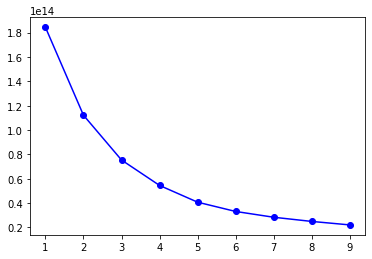

In [143]:
# Line plot # clusters on X-axis and WCSS on Y-axis 
plt.plot(range(1, 10), dist, 'bo-')
plt.show()

In [144]:
cluster  = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
# create 'cluster' column
cluster_data['cluster'] = cluster.fit_predict(cluster_data)

In [145]:
# Cluster centers
centroids = cluster.cluster_centers_

In [146]:
# Within cluster sum of squares
wcss = km.inertia_

In [147]:
centroids

array([[8.99968779e+00, 2.92785002e+00, 5.33409063e+01, 7.08343665e+02,
        4.47430061e+00, 3.33307652e+02, 5.92782098e+00, 1.30497186e+03,
        1.75663893e+02, 6.96191005e+01, 1.52621074e+03, 3.07646559e+03,
        1.00000000e+00, 1.00000000e+00, 2.38693122e+02, 3.09968121e+03],
       [8.79591837e+00, 7.68707483e-01, 1.25517007e+03, 7.66755102e+02,
        4.53741497e+00, 2.68312925e+02, 5.89795918e+00, 7.95459225e+04,
        1.22699051e+04, 1.08933124e+04, 2.31548731e+05, 3.34257871e+05,
        1.00000000e+00, 1.00000000e+00, 1.83135518e+04, 3.80916834e+05],
       [8.97836668e+00, 1.04218496e+00, 1.12269118e+03, 7.61930773e+02,
        4.48080043e+00, 2.93975663e+02, 6.19415900e+00, 3.31798648e+04,
        3.39730162e+03, 5.14550330e+03, 6.21856329e+04, 1.03908303e+05,
        1.00000000e+00, 1.00000000e+00, 6.10190487e+03, 1.06612253e+05],
       [6.00000000e+00, 8.00000000e-01, 2.15380000e+03, 7.72400000e+02,
        5.80000000e+00, 1.98200000e+02, 2.00000000e+00, 4.879

In [148]:
wcss

22119165216199.5

In [149]:
for col in cluster_data[cluster_data['cluster']==0].columns:
  print(cluster_data[col].mode())

0    9
dtype: int32
0    4
dtype: int32
   OSL Total  OSL Total
0          0        0.0
0    1112
dtype: int32
0    5
dtype: int32
0    113
dtype: int32
0    7
dtype: int32
0    0.0
dtype: float64
0    0.0
dtype: float64
   OSL Total  OSL Total
0          0        0.0
0    0.0
dtype: float64
0    0.0
dtype: float64
0    1
dtype: int64
0    1
dtype: int64
0    1.0
dtype: float64
0    0.0
dtype: float64
0    0
dtype: int32


In [150]:
cluster_data.head()

,Cust Type,Order Type,OSL Total,Model,Make,City,ServiceTime_category,Labour Total,Misc Total,OSL Total,Parts Total,Total Amt Wtd Tax.,Partner Type,Title,Order Quantity,Net value,cluster
0,9,1,0,662,6,472,0,3429.34,0.0,0.0,834.41,4263.75,1,1,1208.2,4263.75,0
1,9,0,0,603,8,531,7,0.00,0.0,0.0,0.00,0.00,1,1,0.0,0.00,0
2,9,4,0,486,3,94,7,249.22,0.0,0.0,0.00,249.22,1,1,84.0,249.22,0
3,9,2,0,11,5,0,3,1223.71,0.0,0.0,0.00,1223.71,1,1,288.0,1223.71,0
4,9,3,0,1269,3,582,0,11031.37,0.0,0.0,35257.27,46288.64,1,1,478.0,46288.64,4


In [151]:
cluster_data.to_csv('./Data/Cluster_from_SavioCode.csv', index=False)